# [Hollywood Most Profitable Stories](https://www.kaggle.com/ahmettezcantekin/beginner-datasets)

## by [Hameed](https://www.kaggle.com/shadyghost)

### 74 movies released 2007-2012

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
data_path = "HollywoodsMostProfitableStories.csv"
df = pd.read_csv(data_path)

view the top 5 values in the dataset

In [3]:
df.head(5) 

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,27 Dresses,Comedy,Fox,71.0,5.343622,40.0,160.308654,2008
1,(500) Days of Summer,Comedy,Fox,81.0,8.096000,87.0,60.720000,2009
2,A Dangerous Method,Drama,Independent,89.0,0.448645,79.0,8.972895,2011
3,A Serious Man,Drama,Universal,64.0,4.382857,89.0,30.680000,2009
4,Across the Universe,Romance,Independent,84.0,0.652603,54.0,29.367143,2007


describe the dataset using the description method to compute basic statisics skipping any NaN values

In [4]:
df.describe()

,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
count,73.000000,71.000000,73.000000,74.000000,74.000000
mean,64.136986,4.741610,47.356164,136.351979,2009.054054
std,13.647665,8.292017,26.242655,157.067561,1.353756
min,35.000000,0.005000,3.000000,0.025000,2007.000000
25%,52.000000,1.790680,27.000000,32.447500,2008.000000
50%,64.000000,2.642353,45.000000,73.198612,2009.000000
75%,76.000000,4.850958,65.000000,190.185250,2010.000000
max,89.000000,66.934000,96.000000,709.820000,2011.000000


using the info method to check for null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film               74 non-null     object 
 1   Genre              74 non-null     object 
 2   Lead Studio        73 non-null     object 
 3   Audience  score %  73 non-null     float64
 4   Profitability      71 non-null     float64
 5   Rotten Tomatoes %  73 non-null     float64
 6   Worldwide Gross    74 non-null     float64
 7   Year               74 non-null     int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 4.8+ KB


In [6]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Film
False    74
Name: Film, dtype: int64

Genre
False    74
Name: Genre, dtype: int64

Lead Studio
False    73
True      1
Name: Lead Studio, dtype: int64

Audience  score %
False    73
True      1
Name: Audience  score %, dtype: int64

Profitability
False    71
True      3
Name: Profitability, dtype: int64

Rotten Tomatoes %
False    73
True      1
Name: Rotten Tomatoes %, dtype: int64

Worldwide Gross
False    74
Name: Worldwide Gross, dtype: int64

Year
False    74
Name: Year, dtype: int64



Lead Studio, 
Audience  score %, Rotten Tomatoes %,Profitability, have missing/Nan Values 

one quick way we can deal with missing values by deleting/droping them

In [7]:
df.dropna(inplace=True)

we can use the unique method to check for redundancies and inconsistent names

In [8]:
df['Lead Studio'].unique()

array(['Fox', 'Independent', 'Universal', 'Sony', 'Disney',
       'Warner Bros.', 'Lionsgate', 'Summit', '20th Century Fox',
       'The Weinstein Company', 'New Line', 'Paramount', 'CBS'],
      dtype=object)

in this case we can see that some columns have "Fox" as the lead studio while others have "20th Century Fox" which refers to the same studio, this can lead to issues later so we will replace "Fox" with "20th Century Fox"

***same can be done for fox and disney, lionsgate and summit but ill just allow it***

In [9]:
df["Lead Studio"].replace(to_replace="Fox",value="20th Century Fox", inplace=True)

### value counts
to understand how many units of each charcteristice we have

In [10]:
df['Genre'].value_counts()

Comedy       38
Romance      13
Drama        13
Animation     3
Action        1
Fantasy       1
Name: Genre, dtype: int64

to convert the series of value counts to a data frame we use ".to_frame()"

In [11]:
df['Genre'].value_counts().to_frame()

,Genre
Comedy,38
Romance,13
Drama,13
Animation,3
Action,1
Fantasy,1


In [12]:
## same as above but we rename the coumns to better ##repreesnt the items
genre_counts = df['Genre'].value_counts().to_frame()
genre_counts.rename(columns={'Genre': 'value_counts'}, inplace=True)
genre_counts

,value_counts
Comedy,38
Romance,13
Drama,13
Animation,3
Action,1
Fantasy,1


renaming the index to Genre

In [13]:
genre_counts.index.name = 'Genre'
genre_counts

,value_counts
Genre,
Comedy,38
Romance,13
Drama,13
Animation,3
Action,1
Fantasy,1


doing the same process but for Lead studios

In [14]:
studio_counts = df['Lead Studio'].value_counts().to_frame()
studio_counts.rename(columns={'Lead Studio': 'value_counts'}, inplace=True)
studio_counts.index.name = 'Lead-Studio'
studio_counts

,value_counts
Lead-Studio,
Independent,17
Warner Bros.,12
20th Century Fox,8
Disney,6
Universal,6
Summit,5
Paramount,4
Sony,4
The Weinstein Company,3


## grouping categories

In [15]:
df.columns

Index(['Film', 'Genre', 'Lead Studio', 'Audience  score %', 'Profitability',
       'Rotten Tomatoes %', 'Worldwide Gross', 'Year'],
      dtype='object')

In [16]:
df_group_one = df[['Lead Studio','Genre','Worldwide Gross']]
df_group_one

,Lead Studio,Genre,Worldwide Gross
0,20th Century Fox,Comedy,160.308654
1,20th Century Fox,Comedy,60.720000
2,Independent,Drama,8.972895
3,Universal,Drama,30.680000
4,Independent,Romance,29.367143
...,...,...,...
68,20th Century Fox,Drama,117.094000
69,20th Century Fox,Comedy,219.367646
71,Independent,Comedy,26.660000
72,The Weinstein Company,Comedy,19.620000


We can calculate the average worldwide gross of each studio for each

In [17]:
df_group_one = df_group_one.groupby(['Genre', 'Lead Studio'],as_index=False).mean()
df_group_one.head()

,Genre,Lead Studio,Worldwide Gross
0,Action,Lionsgate,93.400000
1,Animation,Disney,356.776811
2,Comedy,20th Century Fox,120.428050
3,Comedy,CBS,77.090000
4,Comedy,Disney,302.410718


In [18]:
grouped_pivot = df_group_one.pivot(index='Lead Studio',columns='Genre')
grouped_pivot

Worldwide Gross                                      \
Genre                          Action   Animation      Comedy       Drama   
Lead Studio                                                                 
20th Century Fox                  NaN         NaN  120.428050  117.094000   
CBS                               NaN         NaN   77.090000         NaN   
Disney                            NaN  356.776811  302.410718         NaN   
Independent                       NaN         NaN   62.950616   17.437474   
Lionsgate                        93.4         NaN   59.192128         NaN   
New Line                          NaN         NaN   20.710000         NaN   
Paramount                         NaN         NaN   88.288325   72.317989   
Sony                              NaN         NaN   69.745013  114.970000   
Summit                            NaN         NaN   49.960998  382.840000   
The Weinstein Company             NaN         NaN   19.620000    8.258000   
Universal                         NaN         NaN  271.416304   33.380000   
Warner Bros.                      NaN         NaN  167.536054         NaN   

                                            
Genre                  Fantasy     Romance  
Lead Studio                                 
20th Century Fox           NaN   39.664000  
CBS                        NaN         NaN  
Disney                     NaN         NaN  
Independent                NaN  145.419860  
Lionsgate                  NaN         NaN  
New Line                   NaN         NaN  
Paramount                  NaN         NaN  
Sony                       NaN  148.660000  
Summit                     NaN  376.661000  
The Weinstein Company      NaN   41.941000  
Universal                  NaN         NaN  
Warner Bros.           285.431  143.968211

we won't have data for some of the pivot cells. We can fill these missing cells with the value 0

In [19]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

Worldwide Gross                                      \
Genre                          Action   Animation      Comedy       Drama   
Lead Studio                                                                 
20th Century Fox                  0.0    0.000000  120.428050  117.094000   
CBS                               0.0    0.000000   77.090000    0.000000   
Disney                            0.0  356.776811  302.410718    0.000000   
Independent                       0.0    0.000000   62.950616   17.437474   
Lionsgate                        93.4    0.000000   59.192128    0.000000   
New Line                          0.0    0.000000   20.710000    0.000000   
Paramount                         0.0    0.000000   88.288325   72.317989   
Sony                              0.0    0.000000   69.745013  114.970000   
Summit                            0.0    0.000000   49.960998  382.840000   
The Weinstein Company             0.0    0.000000   19.620000    8.258000   
Universal                         0.0    0.000000  271.416304   33.380000   
Warner Bros.                      0.0    0.000000  167.536054    0.000000   

                                            
Genre                  Fantasy     Romance  
Lead Studio                                 
20th Century Fox         0.000   39.664000  
CBS                      0.000    0.000000  
Disney                   0.000    0.000000  
Independent              0.000  145.419860  
Lionsgate                0.000    0.000000  
New Line                 0.000    0.000000  
Paramount                0.000    0.000000  
Sony                     0.000  148.660000  
Summit                   0.000  376.661000  
The Weinstein Company    0.000   41.941000  
Universal                0.000    0.000000  
Warner Bros.           285.431  143.968211

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline 

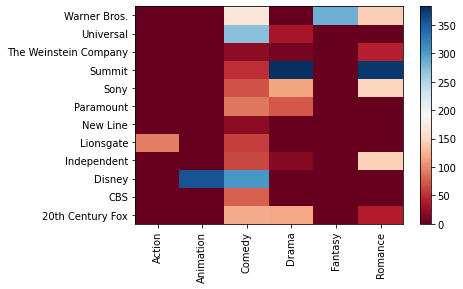

In [21]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

the heatmap show how much on average each studio made from releasing a movie in a particular genre based on the dataset

## Learning about Correlations and causation

Correlation: a measure of the extent of interdependence between variables.

Causation: the relationship between cause and effect between two variables.

### Pearson Correlation
The Pearson Correlation measures the strength of correlation between two features X and Y, represented by a coefficient that is a value between -1 and 1 (inclusive); where:

**1: Perfect positive linear correlation.**

**0: No linear correlation, the two variables most likely do not affect each other**

**-1: Perfect negative linear correlation.**


In [22]:
df.head(5)

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,27 Dresses,Comedy,20th Century Fox,71.0,5.343622,40.0,160.308654,2008
1,(500) Days of Summer,Comedy,20th Century Fox,81.0,8.096000,87.0,60.720000,2009
2,A Dangerous Method,Drama,Independent,89.0,0.448645,79.0,8.972895,2011
3,A Serious Man,Drama,Universal,64.0,4.382857,89.0,30.680000,2009
4,Across the Universe,Romance,Independent,84.0,0.652603,54.0,29.367143,2007


In [23]:
df.corr()

,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
Audience score %,1.000000,0.042005,0.576542,0.396049,-0.189464
Profitability,0.042005,1.000000,0.023352,0.143764,-0.163747
Rotten Tomatoes %,0.576542,0.023352,1.000000,0.008590,-0.083071
Worldwide Gross,0.396049,0.143764,0.008590,1.000000,-0.101855
Year,-0.189464,-0.163747,-0.083071,-0.101855,1.000000


In [24]:
pearson, p_value = stats.pearsonr(df['Audience  score %'],df['Worldwide Gross'])
pearson

0.39604939909373804

the relationship between audience score and worldwide gross is not strong

The P-value is the probability value that the correlation between these two variables is statistically significant.

In [25]:
p_value

0.0007554842127864716

p-value is < 0.001: i think we can say there is strong evidence that the correlation is significant.

In [26]:
pearson2, p_value2 = stats.pearsonr(df['Audience  score %'],df['Rotten Tomatoes %'])
pearson2

0.5765422208820474

the linear relationship of ~0.577 is only modearte 

In [27]:
p_value2

2.167075262825511e-07

the p-value is < 0.001 so the Correlation between audience score and Rotten Tomatoes % is statistically significant

## Learning to visualize all the above

<AxesSubplot:>

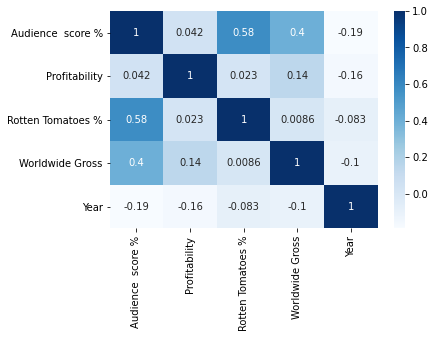

In [28]:
import seaborn as sns
# visualizing the the correlation
data_corr = df.corr()
sns.heatmap(data_corr, cmap="Blues", annot=True)

(0.0, 748.3447431106563)

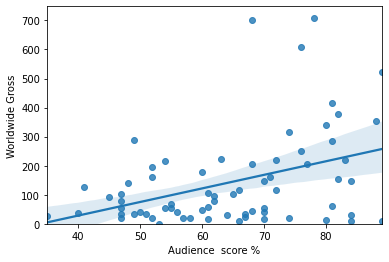

In [29]:
# positive linear relation ship using regplot between audience score and worldwide gross
sns.regplot(x="Audience  score %", y="Worldwide Gross", data=df)
plt.ylim(0,)

In [30]:
df.columns

Index(['Film', 'Genre', 'Lead Studio', 'Audience  score %', 'Profitability',
       'Rotten Tomatoes %', 'Worldwide Gross', 'Year'],
      dtype='object')

(0.0, 100.65)

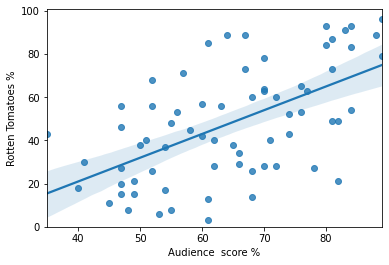

In [31]:
# positive linear relation ship using regplot between audiecne score and rotten tomato 
sns.regplot( x="Audience  score %",y='Rotten Tomatoes %', data=df)
plt.ylim(0,)

[Text(0.5, 1.0, "The relationship between 'Lead Studio' and 'Worldwide gross'")]

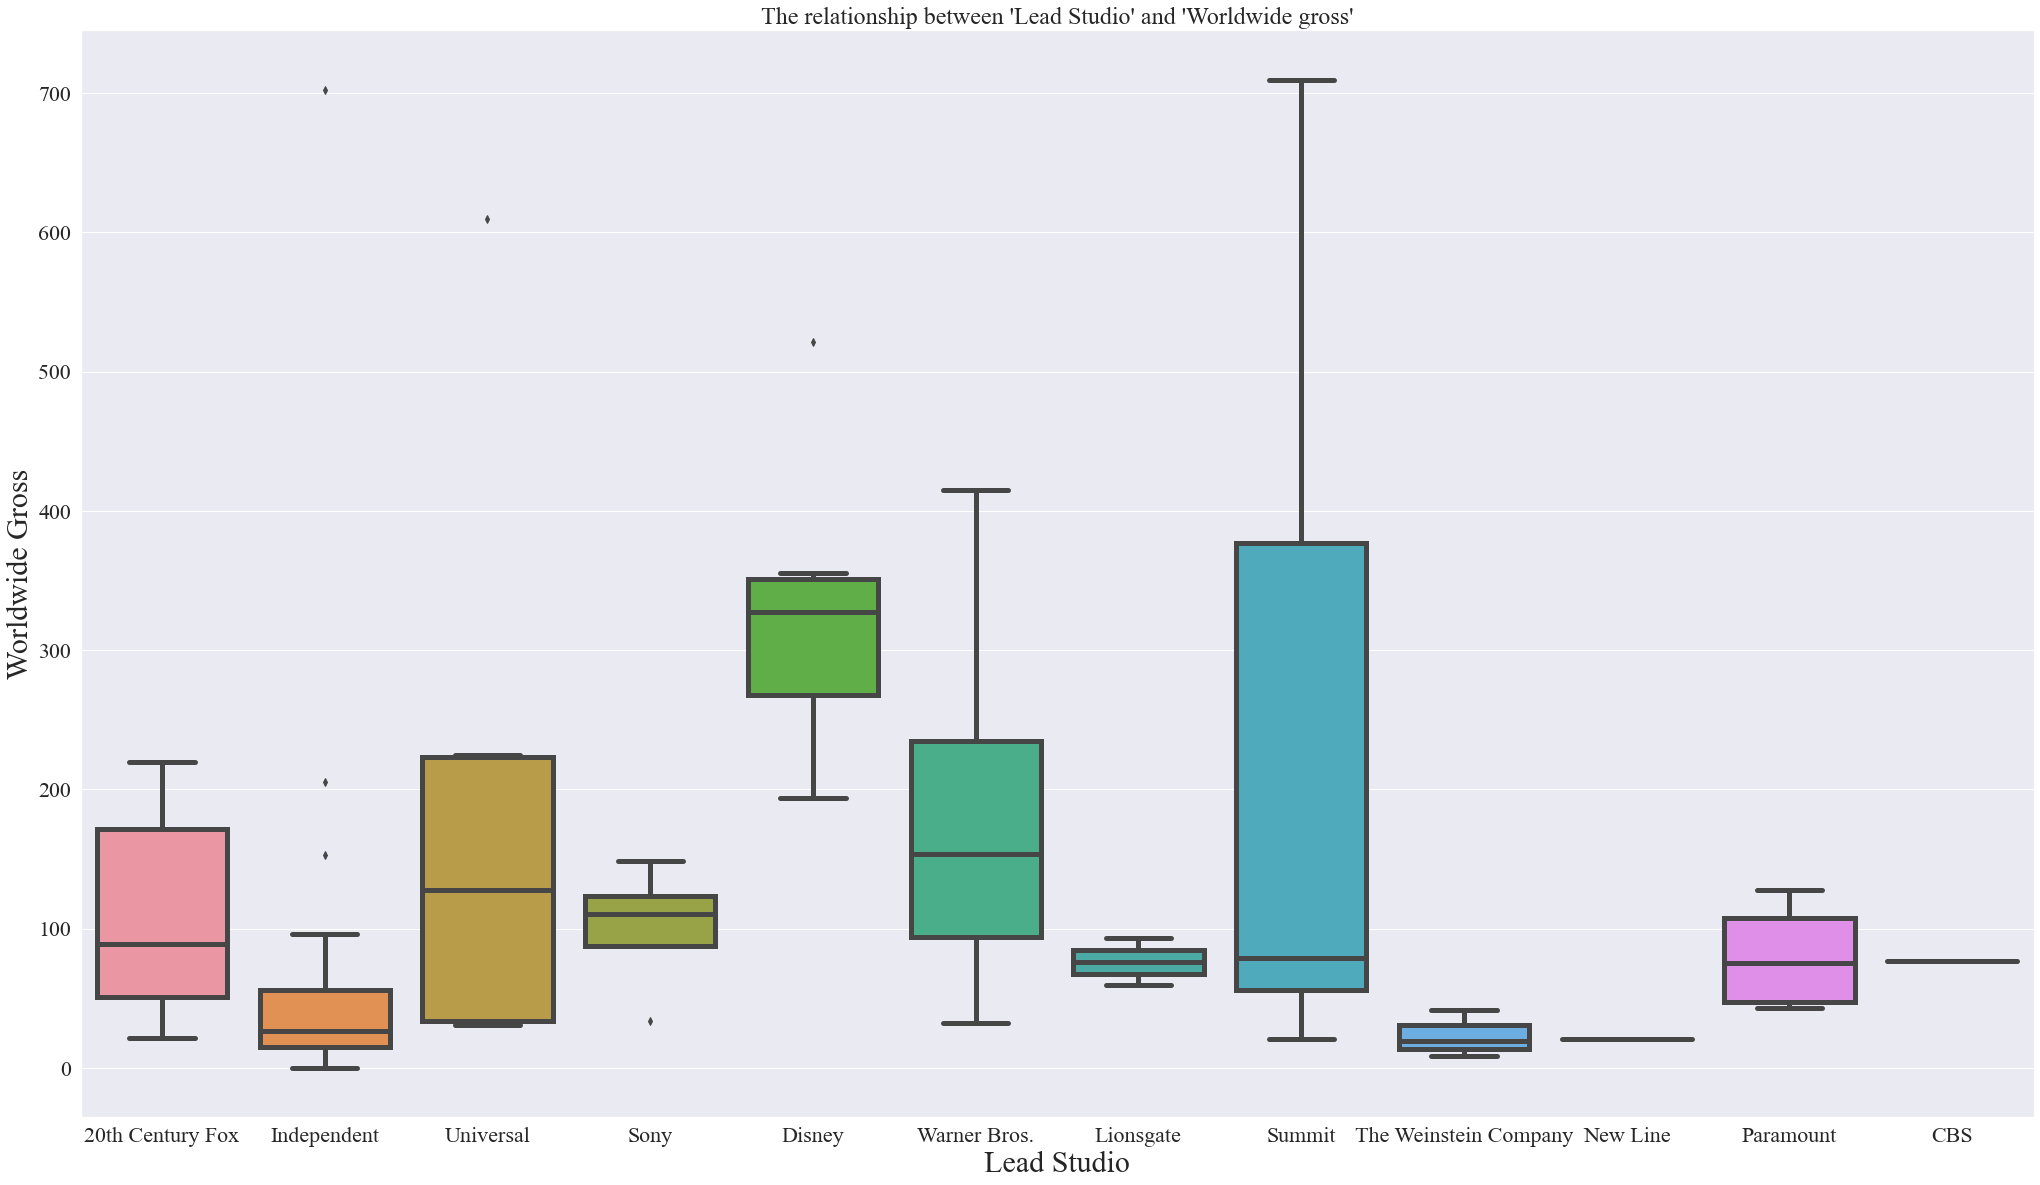

In [32]:
sns.set(rc={"figure.figsize":(35, 20)})
sns.set(font_scale = 2, font='times new roman')
plt.rcParams["axes.labelsize"] = 30
sns.boxplot(x="Lead Studio", y="Worldwide Gross", data=df, width=0.8,linewidth=5).set(title="The relationship between 'Lead Studio' and 'Worldwide gross'")

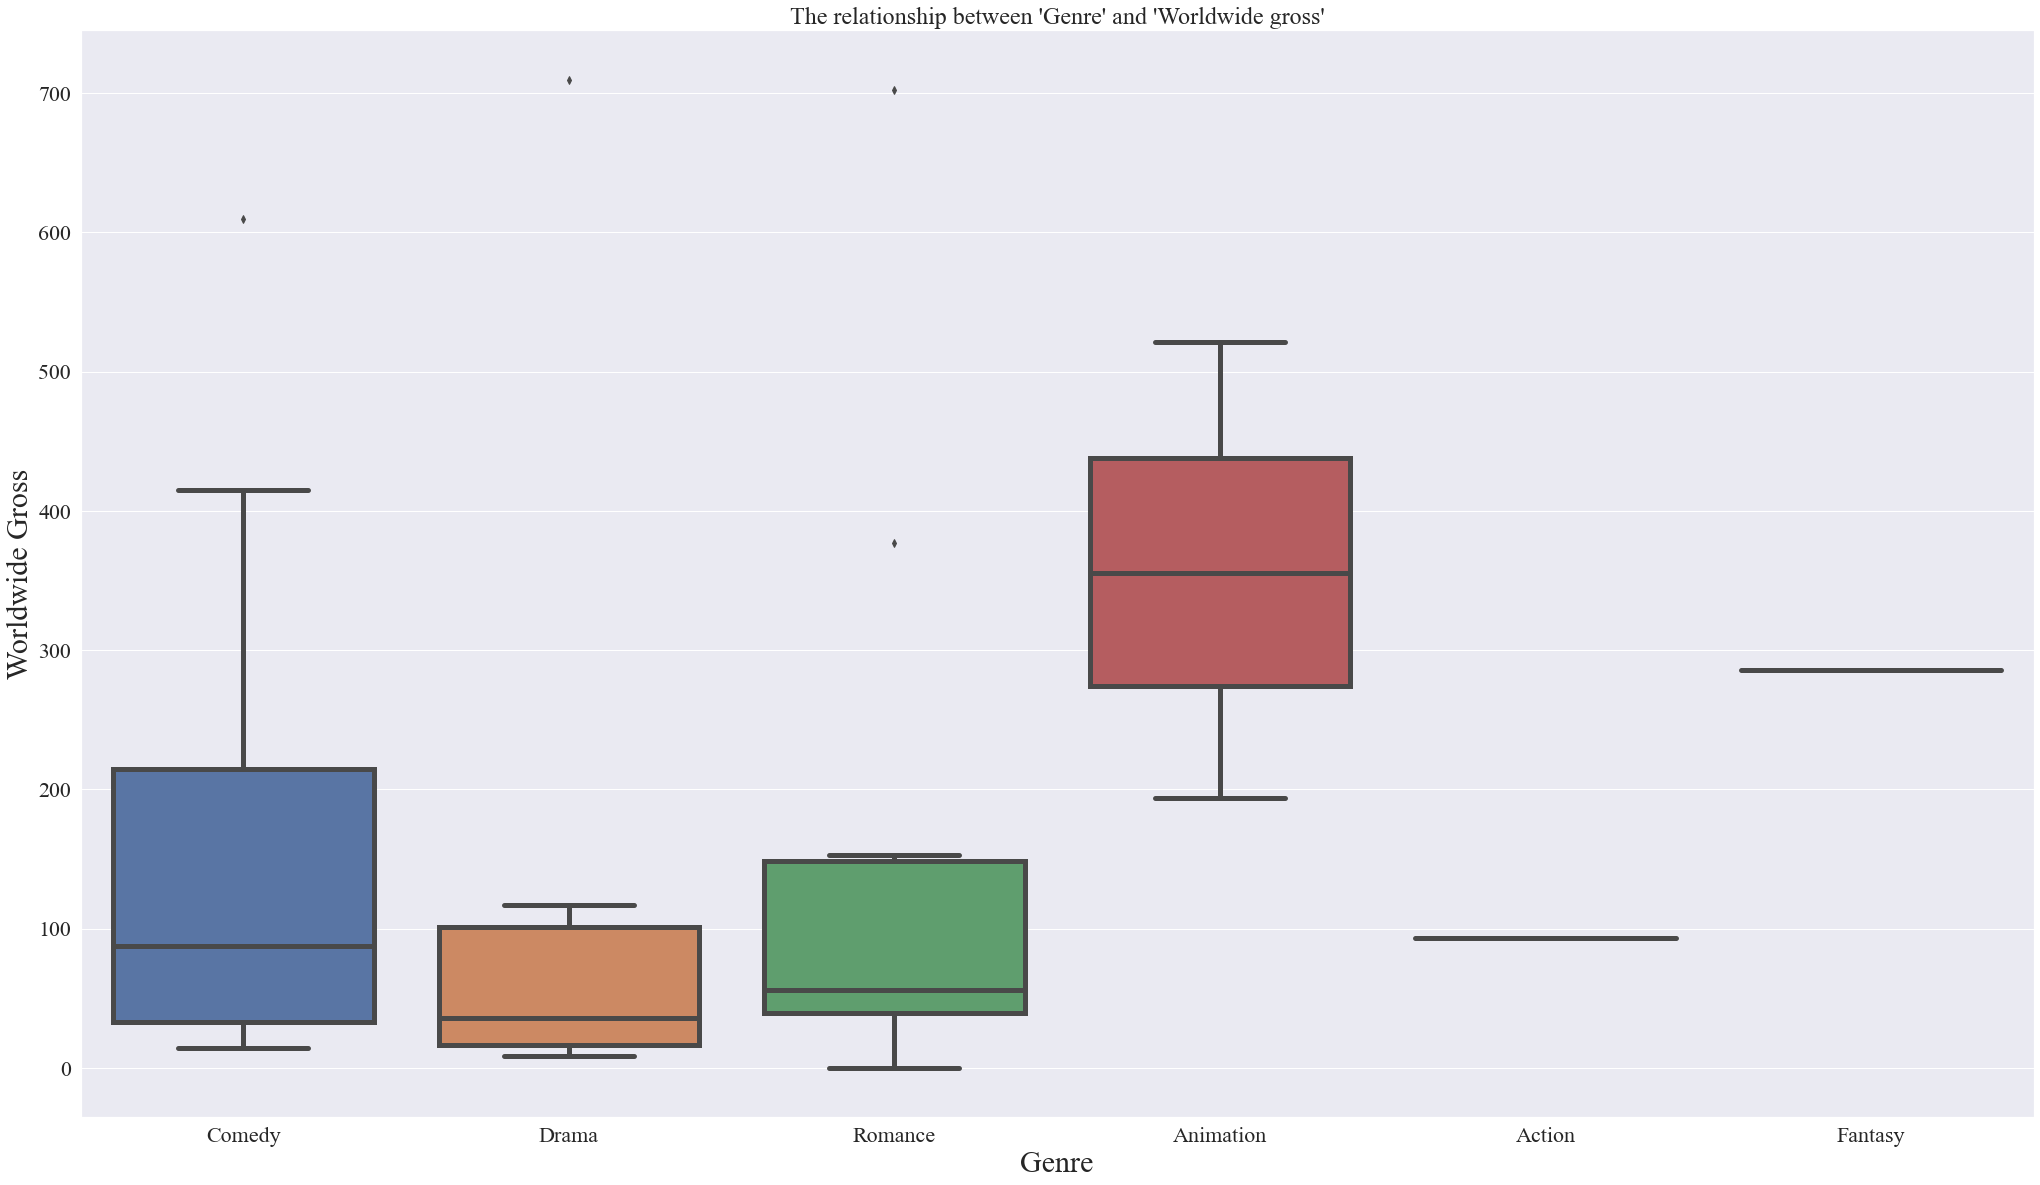

In [33]:
sns.boxplot(x="Genre", y="Worldwide Gross", data=df,linewidth=5).set(title="The relationship between 'Genre' and 'Worldwide gross'") 
sns.set(rc={"figure.figsize":(7, 10)})
## how much eeach genre makes

we create a cross tab of studios and the genres they release for easy visualization

In [34]:
stab = pd.crosstab( df['Lead Studio'],df.Genre)
stab

Genre,Action,Animation,Comedy,Drama,Fantasy,Romance
Lead Studio,,,,,,
20th Century Fox,0,0,6,1,0,1
CBS,0,0,1,0,0,0
Disney,0,3,3,0,0,0
Independent,0,0,6,4,0,7
Lionsgate,1,0,1,0,0,0
New Line,0,0,1,0,0,0
Paramount,0,0,2,2,0,0
Sony,0,0,2,1,0,1
Summit,0,0,2,2,0,1


In [35]:
stab.loc["20th Century Fox"]

Genre
Action       0
Animation    0
Comedy       6
Drama        1
Fantasy      0
Romance      1
Name: 20th Century Fox, dtype: int64

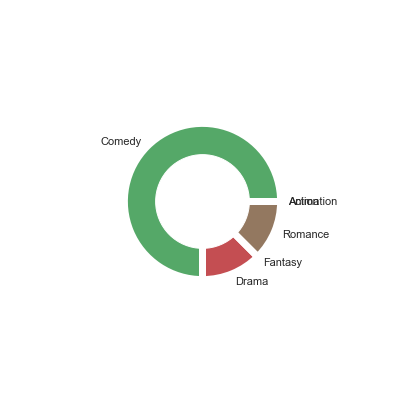

In [36]:

# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.3, color='white')
sns.set(rc={"figure.figsize":(7, 10)})
# Create a pieplot
plt.pie(stab.loc["20th Century Fox"],labels=stab.loc["20th Century Fox"].index,wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' },radius=0.5)

#place white circle on the piechart
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

a pie chart showing that 20th Century Fox has mainly released comedies

## Author

Hameed --- [shadyghost](https://www.kaggle.com/shadyghost)

## miseleanious 
random topics ive explored feel free to ignore from here

In [37]:
df.describe(include=['object'])

,Film,Genre,Lead Studio
count,69,69,69
unique,69,6,12
top,Water For Elephants,Comedy,Independent
freq,1,38,17


In [38]:
max(df["Worldwide Gross"])

709.82

In [39]:
genre= df.groupby(['Genre'],as_index=False).mean()
genre

,Genre,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Action,45.000000,1.245333,11.000000,93.400000,2010.000000
1,Animation,76.333333,3.216561,80.333333,356.776811,2009.666667
2,Comedy,62.105263,3.951967,45.131579,136.673543,2008.815789
3,Drama,67.230769,8.407218,51.538462,99.011375,2009.384615
4,Fantasy,81.000000,1.783944,73.000000,285.431000,2008.000000
5,Romance,66.076923,4.575390,45.692308,147.138572,2009.000000


In [40]:
x=df[["Genre","Worldwide Gross"]].groupby(["Genre"], as_index=False).sum()
x.head()

,Genre,Worldwide Gross
0,Action,93.400000
1,Animation,1070.330432
2,Comedy,5193.594646
3,Drama,1287.147873
4,Fantasy,285.431000


## which Genre make the most money?

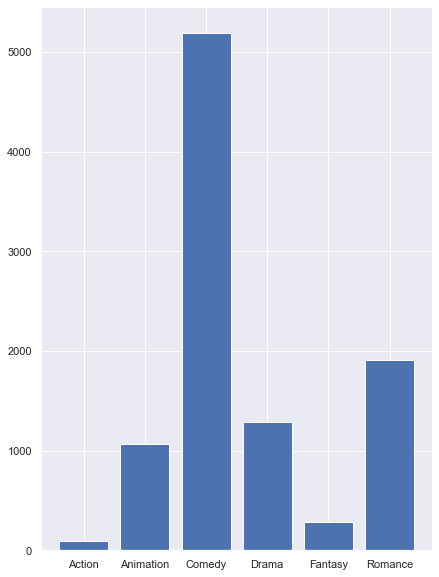

In [41]:
plt.bar(x.Genre,x["Worldwide Gross"])
# plt.bar(df["Worldwide Gross"], df["Genre"], color="red")
# sns.set(rc={"figure.figsize":(8, 8)})
plt.show()

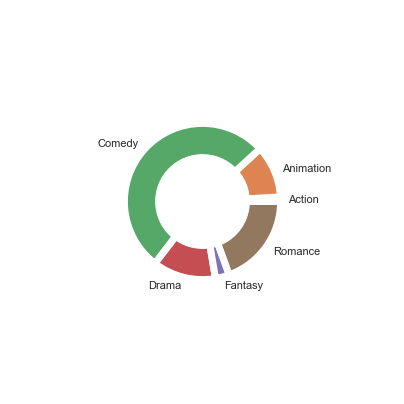

In [42]:
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.3, color='white')
sns.set(rc={"figure.figsize":(7, 10)})
# Create a pieplot
plt.pie(x["Worldwide Gross"],labels=x["Genre"],wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' },radius=0.5)

#place white circle on the piechart
miscplot1 = plt.gcf()
miscplot1.gca().add_artist(my_circle)
plt.show()

## which year made the most worldwide Gross?

In [43]:
t=df[["Year","Worldwide Gross"]].groupby(["Year"], as_index=False).sum()
t.head()

,Year,Worldwide Gross
0,2007,1222.154354
1,2008,3539.170141
2,2009,2007.390000
3,2010,1643.589000
4,2011,1430.401895


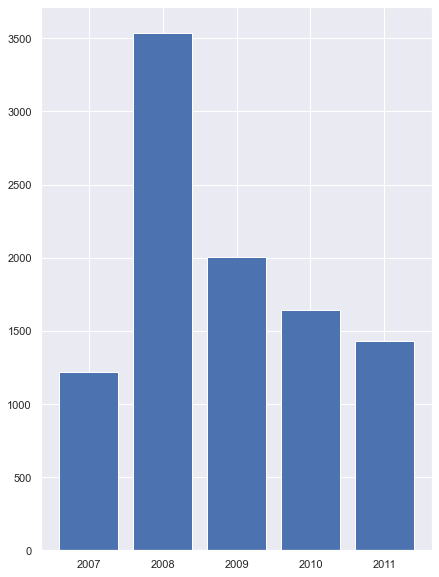

In [44]:
plt.bar(t.Year,t["Worldwide Gross"])
plt.show()